# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Functions definitions

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda

# Read files : radiative budget, tas

In [3]:
# Download the amip dataframes and compute the radiative budget  

path = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/"
filename = "*_amip_*.nc"
variables = ['rlut', 'rsut','rsdt','tas']
start_yr = 1979
drop = False
year_list = range(1983,2014,1)
CNRM_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)

path = "/data/scratch/globc/peatier/CMIP6/MRI-ESM2-0/amip/"
start_yr = 1979
drop = False
year_list = range(1983,2014,1)
MRI_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)

path = "/data/scratch/globc/peatier/CMIP6/CanESM5/amip/"
filename = "standard_*_amip_*.nc"
start_yr = 1950
drop = False
ignore = range(1979,1983,1)
year_list = [ind for ind in range(1950,2014,1) if ind not in ignore]
CAN_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
CAN_amip

path = "/data/scratch/globc/peatier/CMIP6/MIROC6/"
filename = "*_amip_*.nc"
start_yr = 1979
drop = False
ignore = range(1979,1983,1)
year_list = range(1983,2014,1)
MIROC_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
MIROC_amip

path = "/data/scratch/globc/peatier/CMIP6/HadGEM3-GC31-LL/"
filename = "standard_*_amip_*.nc"
start_yr = 1979
drop = True
ignore = range(1979,1983,1)
year_list = range(1983,2014,1)
HadGEM3_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
HadGEM3_amip

path = "/data/scratch/globc/peatier/CMIP6/IPSL-CM6A-LR/"
filename = "*_amip_*.nc"
start_yr = 1979
drop = False
ignore = range(1979,1983,1)
year_list = range(1983,2014,1)
IPSL_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
IPSL_amip

path = "/data/scratch/globc/peatier/CMIP6/BCC-CSM2-MR/"
filename = "standard_*_amip_*.nc"
start_yr = 1979
drop = False
ignore = range(1979,1983,1)
year_list = range(1983,2014,1)
BCC_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
BCC_amip

,rlut,rsut,rsdt,tas,F,H,N
0,132.515900,97.230484,187.988419,159.582962,187.988419,229.746384,-41.757965
1,132.591003,98.032295,187.978455,159.605881,187.978455,230.623291,-42.644836
2,132.604660,97.540260,187.983368,159.581909,187.983368,230.144928,-42.161560
3,132.608932,97.979507,187.939316,159.573120,187.939316,230.588440,-42.649124
4,133.065735,98.381348,187.942490,159.649200,187.942490,231.447083,-43.504593
5,132.414719,98.070969,187.897324,159.560898,187.897324,230.485687,-42.588364
6,132.335907,98.147598,187.883545,159.505630,187.883545,230.483505,-42.599960
7,132.429047,98.358170,187.889542,159.604462,187.889542,230.787216,-42.897675
8,132.724213,97.802536,187.901901,159.696045,187.901901,230.526749,-42.624847
9,132.573578,98.223885,187.949097,159.658203,187.949097,230.797455,-42.848358


In [4]:
# Download the amip-futuer4K dataframes and compute the radiative budget  

path = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/"
filename = "*_amip-future4K_*.nc"
variables=['rlut', 'rsut','rsdt','tas']
start_yr=1979
drop=False
year_list=range(1983,2014,1)
CNRM_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)

path = "/data/scratch/globc/peatier/CMIP6/MRI-ESM2-0/amip/"
start_yr=1979
drop=False
year_list=range(1983,2014,1)
MRI_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)

path = "/data/scratch/globc/peatier/CMIP6/CanESM5/amip/"
filename = "standard_*_amip-future4K_*.nc"
start_yr=1950
drop=False
ignore=range(1979,1983,1)
year_list=[ind for ind in range(1950,2014,1) if ind not in ignore]
CAN_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
CAN_future4K

path = "/data/scratch/globc/peatier/CMIP6/MIROC6/"
filename = "*_amip-future4K_*.nc"
start_yr=1979
drop=False
ignore=range(1979,1983,1)
year_list=range(1983,2014,1)
MIROC_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
MIROC_future4K

path = "/data/scratch/globc/peatier/CMIP6/HadGEM3-GC31-LL/"
filename = "standard_*_amip-future4K_*.nc"
start_yr = 1979
drop = False
ignore = range(1979,1983,1)
year_list = range(1983,2014,1)
HadGEM3_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
HadGEM3_future4K

path = "/data/scratch/globc/peatier/CMIP6/IPSL-CM6A-LR/"
filename = "*_amip-future4K_*.nc"
start_yr = 1979
drop = False
ignore = range(1979,1983,1)
year_list = range(1983,2014,1)
IPSL_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
IPSL_future4K

path = "/data/scratch/globc/peatier/CMIP6/BCC-CSM2-MR/"
filename = "standard_*_amip-future4K_*.nc"
start_yr = 1979
drop = False
ignore = range(1979,1983,1)
year_list = range(1983,2014,1)
BCC_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
BCC_future4K

,rlut,rsut,rsdt,tas,F,H,N
0,248.765839,95.853836,338.498108,292.133087,338.498108,344.619690,-6.121582
1,248.459030,96.180420,338.479889,292.145935,338.479889,344.639465,-6.159576
2,248.590317,96.346054,338.488464,292.103027,338.488464,344.936371,-6.447906
3,248.539948,97.338448,338.409027,292.049835,338.409027,345.878387,-7.469360
4,249.229477,97.084740,338.414551,292.242340,338.414551,346.314209,-7.899658
5,248.665192,96.680000,338.333130,292.184937,338.333130,345.345184,-7.012054
6,248.131775,96.665474,338.308258,292.013519,338.308258,344.797241,-6.488983
7,248.097534,96.778702,338.319000,292.058502,338.319000,344.876221,-6.557220
8,248.894226,96.667168,338.341248,292.316589,338.341248,345.561401,-7.220154
9,248.453217,97.026527,338.426208,292.167938,338.426208,345.479736,-7.053528


In [5]:
result= pd.DataFrame()
df_CTL=CNRM_amip
df=CNRM_future4K
expe_name='CNRM_future4K'
n=len(CNRM_future4K)
result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

df_CTL=MRI_amip
df=MRI_future4K
expe_name='MRI_future4K'
n=len(MRI_future4K)
result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

df_CTL=CAN_amip
df=CAN_future4K
expe_name='CAN_future4K'
n=len(CAN_future4K)
result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

df_CTL=MIROC_amip
df=MIROC_future4K
expe_name='MIROC_future4K'
n=len(MIROC_future4K)
result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

df_CTL=HadGEM3_amip
df=HadGEM3_future4K
expe_name='HadGEM3_future4K'
n=len(HadGEM3_future4K)
result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

df_CTL=IPSL_amip
df=IPSL_future4K
expe_name='IPSL_future4K'
n=len(IPSL_future4K)
result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

df_CTL=BCC_amip
df=BCC_future4K
expe_name='BCC_future4K'
n=len(BCC_future4K)
result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

result

,Delta_N_CNRM_future4K,Delta_tas_CNRM_future4K,Lambda_CNRM_future4K,Delta_N_MRI_future4K,Delta_tas_MRI_future4K,Lambda_MRI_future4K,Delta_N_CAN_future4K,Delta_tas_CAN_future4K,Lambda_CAN_future4K,Delta_N_MIROC_future4K,...,Lambda_MIROC_future4K,Delta_N_HadGEM3_future4K,Delta_tas_HadGEM3_future4K,Lambda_HadGEM3_future4K,Delta_N_IPSL_future4K,Delta_tas_IPSL_future4K,Lambda_IPSL_future4K,Delta_N_BCC_future4K,Delta_tas_BCC_future4K,Lambda_BCC_future4K
0,-6.228882,4.776276,-1.304129,-9.039978,4.652863,-1.942885,-5.614990,4.941437,-1.136307,-8.523651,...,-1.874567,-5.805176,4.364899,-1.329968,-4.936310,4.233032,-1.166140,-8.778229,4.782684,-1.835419
1,-6.038864,4.732147,-1.276136,-8.829376,4.688477,-1.883208,-5.403137,4.887985,-1.105392,-8.651779,...,-1.884614,-5.974380,4.391968,-1.360297,-5.163712,4.330368,-1.192442,-8.319962,4.768463,-1.744789
2,-6.135254,4.748830,-1.291951,-8.689015,4.665639,-1.862342,-5.490845,4.883321,-1.124408,-8.828115,...,-1.916081,-6.074066,4.405344,-1.378795,-5.149821,4.337118,-1.187383,-8.421509,4.763814,-1.767808
3,-6.028839,4.750420,-1.269117,-8.570137,4.682671,-1.830181,-5.607880,4.889175,-1.146999,-8.911591,...,-1.911769,-5.924591,4.419907,-1.340434,-5.358017,4.393784,-1.219454,-8.596390,4.752144,-1.808950
4,-5.931897,4.725659,-1.255253,-8.540747,4.669141,-1.829190,-5.482379,4.867462,-1.126332,-8.854773,...,-1.900749,-5.900922,4.446173,-1.327191,-5.277521,4.420764,-1.193803,-8.590052,4.750018,-1.808425


# Create plot

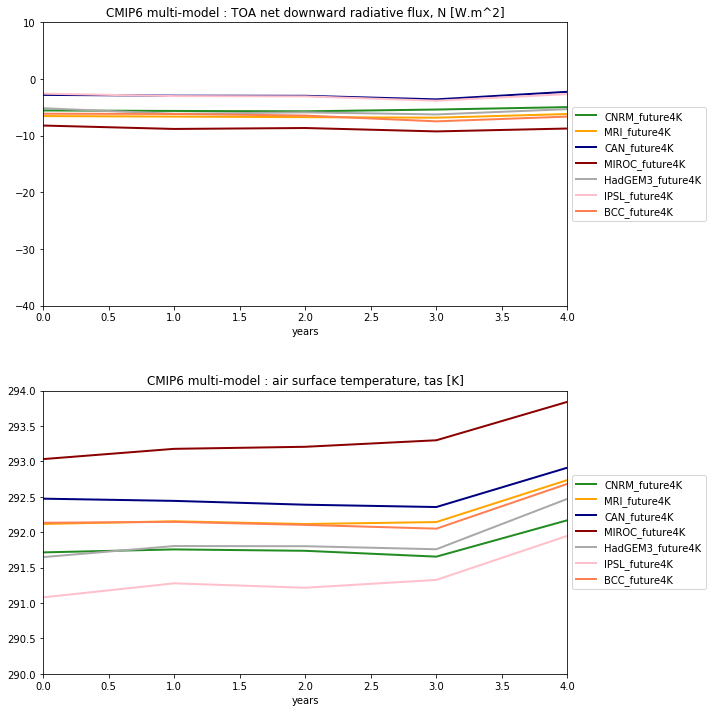

In [17]:
# PARAMETERS :
df=[None]*7
df[:] = [CNRM_future4K, MRI_future4K, CAN_future4K, MIROC_future4K, HadGEM3_future4K, IPSL_future4K, 
         BCC_future4K]
cmap = plt.get_cmap('ocean')
colors = ['forestgreen', 'orange', 'navy', 'darkred', 'darkgray', 'pink', 'coral']
linewidth = [2.0]*7

xlabel = 'years'
xmin = 0
xmax = 4
legend = ['CNRM_future4K', 'MRI_future4K', 'CAN_future4K', 'MIROC_future4K', 'HadGEM3_future4K', 'IPSL_future4K', 
         'BCC_future4K']

# Plot of lines from different dataframes
plt.subplots(figsize=(10,10)) 

plt.subplot(211)
title = 'CMIP6 multi-model : TOA net downward radiative flux, N [W.m^2]'
y = 'N'
ymin = -40.0
ymax = 10.0
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

plt.subplot(212)
title='CMIP6 multi-model : air surface temperature, tas [K]'
y = 'tas'
ymin = 290.0
ymax = 294.0
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/longPPE_N_tas.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

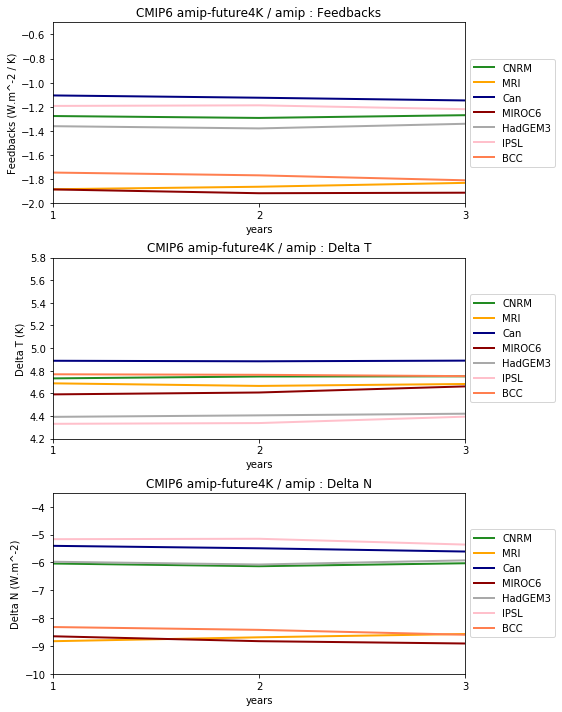

In [6]:
# PARAMETERS
df = result
cmap = plt.get_cmap('ocean')
xlabel='years'
xmin = 0
xmax = 4
legend=['CNRM', 'MRI', 'Can', 'MIROC6', 'HadGEM3', 'IPSL', 'BCC']
colors = ['forestgreen', 'orange', 'navy', 'darkred', 'darkgray', 'pink', 'coral']
linewidth = [2.0]*len(legend)

#--------------------------- Plot result : future4K --------------------------------------
plt.subplots(figsize=(8,10))

plt.subplot(311)
title="CMIP6 amip-future4K / amip : Feedbacks"
ymin = -2.0
ymax = -0.5

n=len(legend)
y=[None]*n
y[0] = 'Lambda_CNRM_future4K'
y[1] = 'Lambda_MRI_future4K'
y[2] = 'Lambda_CAN_future4K'
y[3] = 'Lambda_MIROC_future4K'
y[4] = 'Lambda_HadGEM3_future4K'
y[5] = 'Lambda_IPSL_future4K'
y[6] = 'Lambda_BCC_future4K'
plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Feedbacks (W.m^-2 / K)')
plt.xlim(1, 3)
plt.xticks([1, 2, 3])

plt.subplot(312)
title="CMIP6 amip-future4K / amip : Delta T"
ymin = 4.2
ymax = 5.8

n=len(legend)
y=[None]*n
y[0] = 'Delta_tas_CNRM_future4K'
y[1] = 'Delta_tas_MRI_future4K'
y[2] = 'Delta_tas_CAN_future4K'
y[3] = 'Delta_tas_MIROC_future4K'
y[4] = 'Delta_tas_HadGEM3_future4K'
y[5] = 'Delta_tas_IPSL_future4K'
y[6] = 'Delta_tas_BCC_future4K'
plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Delta T (K)')
plt.xlim(1, 3)
plt.xticks([1, 2, 3])



plt.subplot(313)
title="CMIP6 amip-future4K / amip : Delta N"
ymin = -10.0
ymax = -3.5

n=len(legend)
y=[None]*n
y[0] = 'Delta_N_CNRM_future4K'
y[1] = 'Delta_N_MRI_future4K'
y[2] = 'Delta_N_CAN_future4K'
y[3] = 'Delta_N_MIROC_future4K'
y[4] = 'Delta_N_HadGEM3_future4K'
y[5] = 'Delta_N_IPSL_future4K'
y[6] = 'Delta_N_BCC_future4K'
plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Delta N (W.m^-2)')
plt.xlim(1, 3)
plt.xticks([1, 2, 3])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)


# Enregistrer la figure ...........

plt.savefig("/data/home/globc/peatier/figures/CMIP6_feedbacks_DT_DN.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

In [13]:
CMIP6_NetFeedbcks=[1]*7
CMIP6_NetFeedbcks[0] = result['Lambda_CNRM_future4K'].mean()
CMIP6_NetFeedbcks[1] = result['Lambda_MRI_future4K'].mean()
CMIP6_NetFeedbcks[2] = result['Lambda_CAN_future4K'].mean()
CMIP6_NetFeedbcks[3] = result['Lambda_MIROC_future4K'].mean()
CMIP6_NetFeedbcks[4] = result['Lambda_HadGEM3_future4K'].mean()
CMIP6_NetFeedbcks[5] = result['Lambda_IPSL_future4K'].mean()
CMIP6_NetFeedbcks[6] = result['Lambda_BCC_future4K'].mean()

CMIP6_NetFeedbcks

[-1.2793172359466554,
 -1.8695613622665406,
 -1.1278875827789308,
 -1.897555899620056,
 -1.3473369359970093,
 -1.1918444395065309,
 -1.7930780887603759]

In [14]:
# Save the numpy array  in a file 
np.save('/data/home/globc/peatier/CNRMppe/PPE/CMIP6_NetFeedbcks.npy', CMIP6_NetFeedbcks)